In [1]:
%pylab inline
import yt
import glob
import os
import thingking
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

Populating the interactive namespace from numpy and matplotlib


In [2]:
k_list = []
os.chdir("../scivis2MMBK/")
for k in glob.glob("centers*.txt"):
    try:
        k_list.append(int(k.split('.')[0][7:]))
    except ValueError:
        continue
k_list = sort(list(set(k_list)))
print k_list 

[  100  1000  3000  4000 10000 20000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000 40000 42000 43000 44000 45000 46000 47000 48000
 49000 50000 55000 60000]


In [3]:
mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
aname = "ds14_a_halos_1.0000.hist8_m200b"
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)
m=3.9e10
N= halo_catalog[:,4]/m #number of particle per halo = m200b/mass per particle
m200b= halo_catalog[:,4]
n_1, bins = np.histogram(m200b)

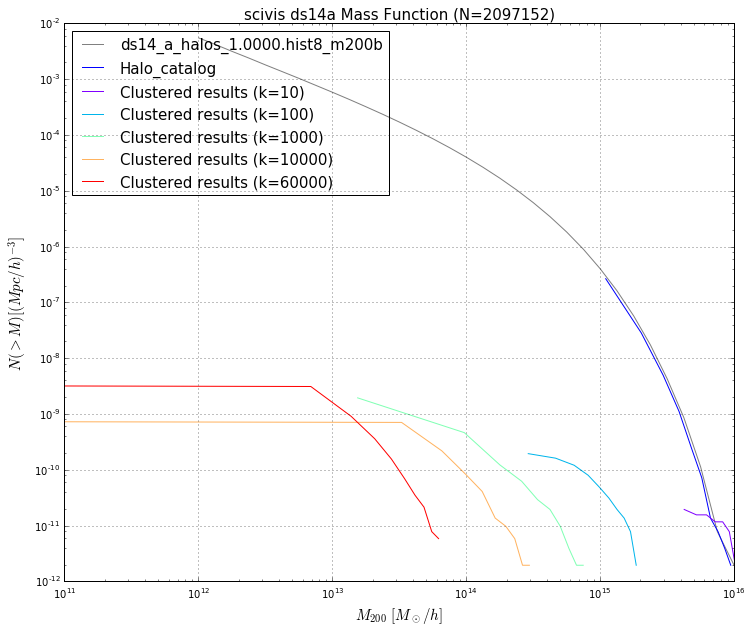

In [16]:
k_list  = [10,100,1000,10000,60000]
V = 8000.**3
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
color = cm.rainbow(np.linspace(0, 1, len(k_list)))
#Plotting data from pre-built histogram data: ds14_a_halos_1.0000.hist8_m200b
bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(mf_prefix+aname, unpack=True)
mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
if n.sum() > 0:
    ngtm = np.cumsum(n[mask][::-1])[::-1]
    xx.loglog(bin_center_mass[mask], ngtm/V,ms=4, mec='None', color="gray",label="ds14_a_halos_1.0000.hist8_m200b")
#Plotting data from DS Halo Catalog
ngtm = np.cumsum(n_1[::-1])[::-1]
a=1.1 #factor for matching with histo data 
xx.loglog(bins[:-1]*a, ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")
#Plotting clustered result from Kmeans
for k,col in zip(k_list,color):
    centers  = np.loadtxt("../scivis2MMBK/centers{}.txt".format(k))
    labels  = np.loadtxt("../scivis2MMBK/labels{}.txt".format(k))
    density  = np.loadtxt("../scivis2MMBK/density{}.txt".format(k))
    idx_list = []
    N_list = []
    for i in np.arange(k): 
        idx = np.where(labels==i)[0]
        idx_list.append(idx)
        N_list.append(len(idx))
    idx = np.array(idx_list)
    N = np.array(N_list)
    m200b_2 =N*m
    n_2, bins_2 = np.histogram(m200b_2)
    ngtm2 = np.cumsum(n_2[::-1])[::-1]
    xx.loglog(bins_2[:-1], ngtm2/V,label="Clustered results (k={})".format(k),ms=4, mec='None',color=col)
xx.set_title('scivis ds14a Mass Function (N=2097152)',fontsize=15)
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14},fontsize=15)
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14},fontsize=15)
leg = xx.legend(loc="upper left",labelspacing=.5,fontsize=15)
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.xlim(1e11,1e16)
plt.show()